In [20]:
import pandas as pd
import data_cleanup as dc
import domain_comparison as doc
import data_exploration as de
import seaborn as sns
import matplotlib.pyplot as plt
import severity_score as ses
import numpy as np
from scipy.stats import gaussian_kde

### In this document the same operations as in Domain_slicing are done. In this case amino acids based on random codon generation are removed before.

Starting out with Generation of the new DF with only the random mutations. For further details see the severity_score folder.

In [21]:
fpath = '../DMS_data/P53_HUMAN_Giacomelli_NULL_Etoposide_2018.csv'

gia_null_eto =dc.norm(pd.read_csv(fpath))
dc.aufteilung_mut_pos(gia_null_eto)

dna_sequence = "ATGGAGGAGCCGCAGTCAGATCCTAGCGTCGAGCCCCCTCTGAGTCAGGAAACATTTTCAGACCTATGGAAACTACTTCCTGAAAACAACGTTCTGTCCCCCTTGCCGTCCCAAGCAATGGATGATTTGATGCTGTCCCCGGACGATATTGAACAATGGTTCACTGAAGACCCAGGTCCAGATGAAGCTCCCAGAATGCCAGAGGCTGCTCCCCCCGTGGCCCCTGCACCAGCAGCTCCTACACCGGCGGCCCCTGCACCAGCCCCCTCCTGGCCCCTGTCATCTTCTGTCCCTTCCCAGAAAACCTACCAGGGCAGCTACGGTTTCCGTCTGGGCTTCTTGCATTCTGGGACAGCCAAGTCTGTGACTTGCACGTACTCCCCTGCCCTCAACAAGATGTTTTGCCAACTGGCCAAGACCTGCCCTGTGCAGCTGTGGGTTGATTCCACACCCCCGCCCGGCACCCGCGTCCGCGCCATGGCCATCTACAAGCAGTCACAGCACATGACGGAGGTTGTGAGGCGCTGCCCCCACCATGAGCGCTGCTCAGATAGCGATGGTCTGGCCCCTCCTCAGCATCTTATCCGAGTGGAAGGAAATTTGCGTGTGGAGTATTTGGATGACAGAAACACTTTTCGACATAGTGTGGTGGTGCCCTATGAGCCGCCTGAGGTTGGCTCTGACTGTACCACCATCCACTACAACTACATGTGTAACAGTTCCTGCATGGGCGGCATGAACCGGAGGCCCATCCTCACCATCATCACACTGGAAGACTCCAGTGGTAATCTACTGGGACGGAACAGCTTTGAGGTGCGTGTTTGTGCCTGTCCTGGGAGAGACCGGCGCACAGAGGAAGAGAATCTCCGCAAGAAAGGGGAGCCTCACCACGAGCTGCCCCCAGGGAGCACTAAGCGAGCACTGCCCAACAACACCAGCTCCTCTCCCCAGCCAAAGAAGAAACCACTGGATGGAGAATATTTCACCCTTCAGATCCGTGGGCGTGAGCGCTTCGAGATGTTCCGAGAGCTGAATGAGGCCTTGGAACTCAAGGATGCCCAGGCTGGGAAGGAGCCAGGGGGGAGCAGGGCTCACTCCAGCCACCTGAAGTCCAAAAAGGGTCAGTCTACCTCCCGCCATAAAAAACTCATGTTCAAGACAGAAGGGCCTGACTCAGAC"
rna_sequence = dna_sequence.replace("T", "U")

p53_codons = [rna_sequence[i:i+3] for i in range(0, len(rna_sequence), 3)]

p53_codons[71] = "CGC"

mutated_p53 = ses.generate_codon_variations_rdm(p53_codons)

translated_p53 = ses.translate_codons_df(mutated_p53)

cleaned_p53 = ses.clean_variation_matrix(translated_p53)

df = gia_null_eto[gia_null_eto.apply(lambda row: (cleaned_p53.loc[row['position_mut']-1, 'Original'] == row['AS_old']) and (row['AS_new'] in cleaned_p53.loc[row['position_mut']-1, ['Variation 1', 'Variation 2', 'Variation 3', 'Variation 4', 'Variation 5', 'Variation 6', 'Variation 7', 'Variation 8', 'Variation 9']].values), axis=1)]

,Original,Variation 1,Variation 2,Variation 3,Variation 4,Variation 5,Variation 6,Variation 7,Variation 8,Variation 9
0,AUG,CGG,GCC,CGT,GCT,CCC,CTA,ACC,GAG,CGA
1,GAG,TAC,TAG,AGC,TCA,ACG,GTT,AGG,AAC,CCA
2,GAG,GTT,TAG,TGA,TGC,TTG,TAC,CGG,TGG,ACC
3,CCG,TTG,TGA,TGT,CAG,GGT,ATT,TCA,ATC,GGA
4,CAG,CCT,GAT,GGG,TCT,GGT,GCT,TGC,GGC,TTT
...,...,...,...,...,...,...,...,...,...,...
388,GGG,AAT,GGA,GTG,GGG,CCA,CGG,CAA,ACC,ACA
389,CCU,CCC,AAA,ACG,CGA,CCT,GGC,GAG,ATA,GTT
390,GAC,GTC,TGT,ATC,GCA,GAG,CTC,GAC,GTT,TTC
391,UCA,GGA,GGC,GCC,TAA,AGC,TAG,AAC,CAC,AAG


In [22]:
# Saving the different domains for better accessibility

#Transactivation Domain 1
t1_start = 1
t1_end = 43

#Transactivation Domain 2
t2_start = 44
t2_end = 63

#Proline-rich Region
pr_start = 64
pr_end = 92

#DNA Binding Domain
dna_start = 102
dna_end = 292

#Tetramerization Domain
tetra_start = 320
tetra_end = 355

#Regulatory Domain
reg_start = 356
reg_end = 393



t1_domain = dc.rmv_na(dc.df_transform(doc.slice_domain(df, start= t1_start, end= t1_end)))
t1_list = doc.slice_domain(df, start= t1_start, end= t1_end)

t2_domain = dc.rmv_na(dc.df_transform(doc.slice_domain(df, start= t2_start, end= t2_end)))
t2_list = doc.slice_domain(df, start= t2_start, end= t2_end)

pr_domain = dc.rmv_na(dc.df_transform(doc.slice_domain(df, start= pr_start, end= pr_end)))
pr_list = doc.slice_domain(df, start= pr_start, end= pr_end)

dna_domain = dc.rmv_na(dc.df_transform(doc.slice_domain(df, start= dna_start, end= dna_end)))
dna_list = doc.slice_domain(df, start= dna_start, end= dna_end)

tetra_domain = dc.rmv_na(dc.df_transform(doc.slice_domain(df, start= tetra_start, end= tetra_end)))
tetra_list = doc.slice_domain(df, start= tetra_start, end= tetra_end)

reg_domain = dc.rmv_na(dc.df_transform(doc.slice_domain(df, start= reg_start, end= reg_end)))
reg_list = doc.slice_domain(df, start= reg_start, end= reg_end)


## Mean values

In [23]:
t1_mean = t1_domain.mean().rename('mean')

t2_mean = t2_domain.mean().rename('mean')

pr_mean = pr_domain.mean().rename('mean')

dna_mean = dna_domain.mean().rename('mean')

tetra_mean = tetra_domain.mean().rename('mean')

reg_mean = reg_domain.mean().rename('mean')


## Distribution and Heatmaps
### Transactivation Domain 1

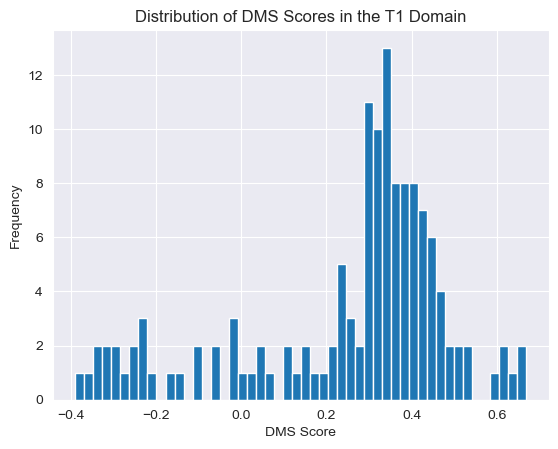

0.24868700555277304
0.3281311718762301


<Axes: xlabel='position_mut-AS_old', ylabel='AS_new'>

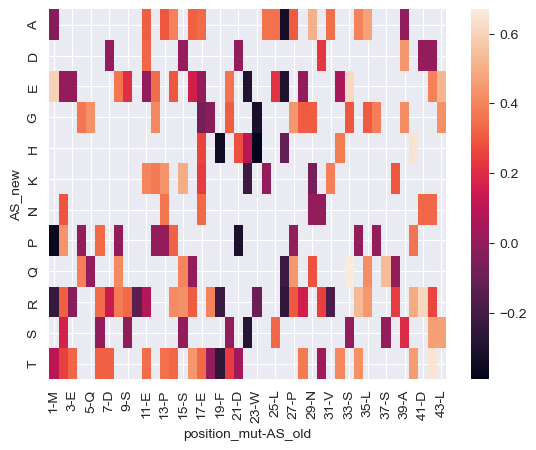

In [24]:
dms_scores_t1 = t1_list['DMS_score']

plt.hist(dms_scores_t1, bins=50)
plt.xlabel('DMS Score')
plt.ylabel('Frequency')
plt.title('Distribution of DMS Scores in the T1 Domain')
plt.show()

print(dms_scores_t1.mean())
print(dms_scores_t1.median())
sns.heatmap(t1_domain)

### Transactivation Domain 2

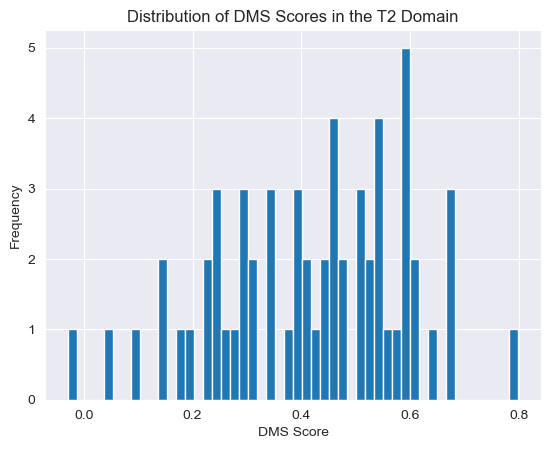

<Axes: xlabel='position_mut-AS_old', ylabel='AS_new'>

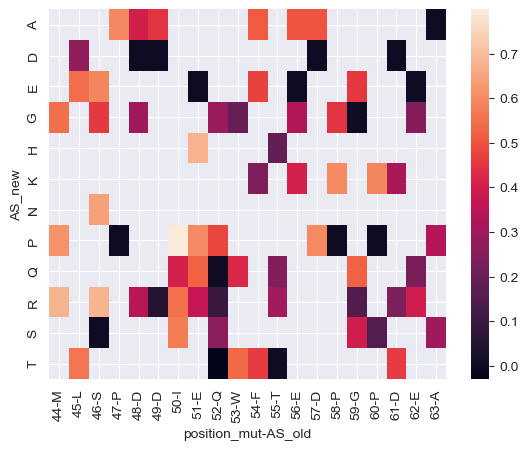

In [25]:
dms_scores_t2 = t2_list['DMS_score']

plt.hist(dms_scores_t2, bins=50)
plt.xlabel('DMS Score')
plt.ylabel('Frequency')
plt.title('Distribution of DMS Scores in the T2 Domain')
plt.show()

sns.heatmap(t2_domain)

### Proline-rich Region

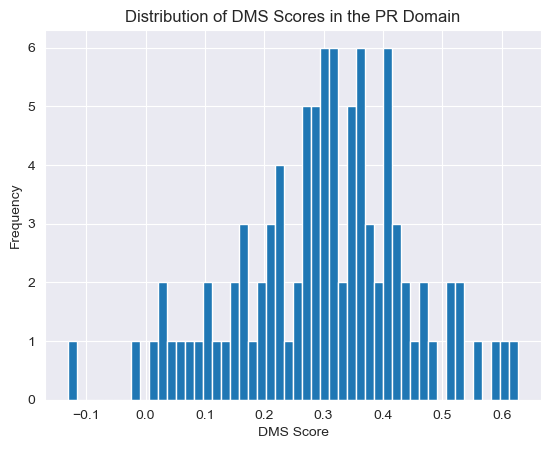

<Axes: xlabel='position_mut-AS_old', ylabel='AS_new'>

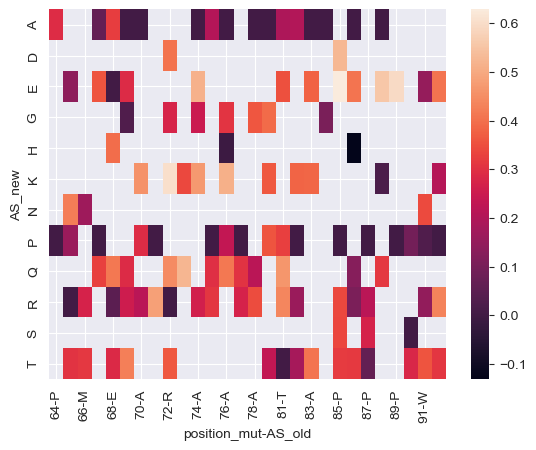

In [26]:
dms_scores_pr = pr_list['DMS_score']

plt.hist(dms_scores_pr, bins=50)
plt.xlabel('DMS Score')
plt.ylabel('Frequency')
plt.title('Distribution of DMS Scores in the PR Domain')
plt.show()

sns.heatmap(pr_domain)

### DNA Binding Domain

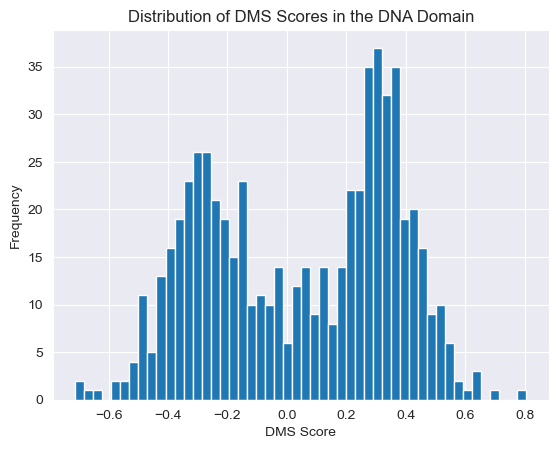

0.046865512970776645
0.09180435043044566


<Axes: xlabel='position_mut-AS_old', ylabel='AS_new'>

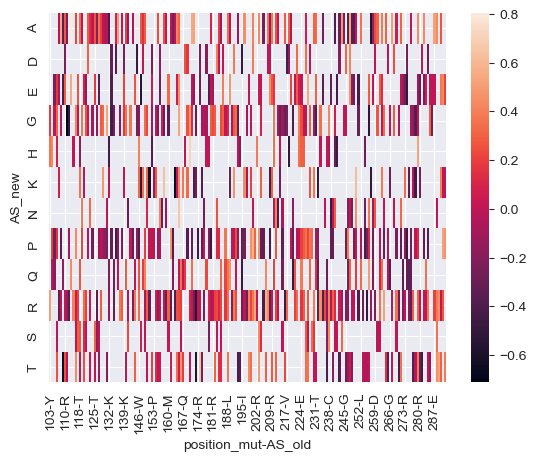

In [27]:
dms_scores_dna = dna_list['DMS_score']

plt.hist(dms_scores_dna, bins=50)
plt.xlabel('DMS Score')
plt.ylabel('Frequency')
plt.title('Distribution of DMS Scores in the DNA Domain')
plt.show()

print(dms_scores_dna.mean())
print(dms_scores_dna.median())

sns.heatmap(dna_domain)

### Tetramerization Domain

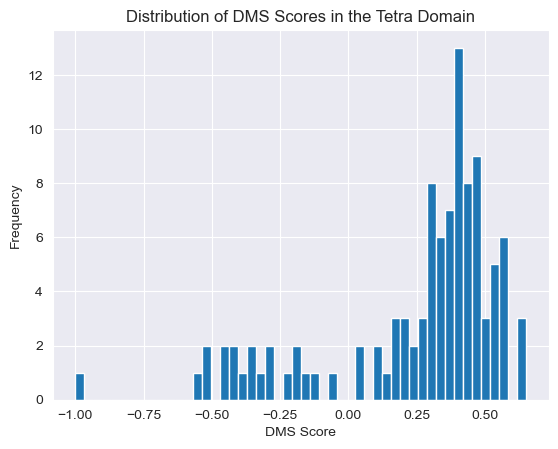

0.2405152773990062
0.3629014405291009


<Axes: xlabel='position_mut-AS_old', ylabel='AS_new'>

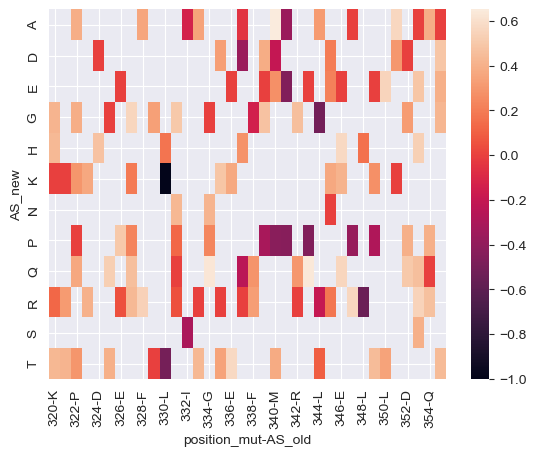

In [28]:
dms_scores_tetra = tetra_list['DMS_score']

plt.hist(dms_scores_tetra, bins=50)
plt.xlabel('DMS Score')
plt.ylabel('Frequency')
plt.title('Distribution of DMS Scores in the Tetra Domain')
plt.show()

print(dms_scores_tetra.mean())
print(dms_scores_tetra.median())

sns.heatmap(tetra_domain)

### Regulatory Domain

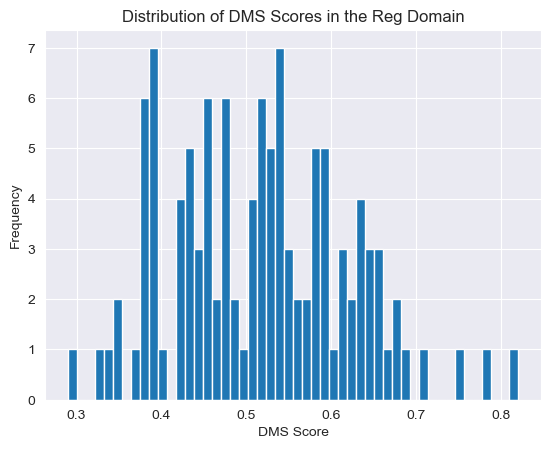

<Axes: xlabel='position_mut-AS_old', ylabel='AS_new'>

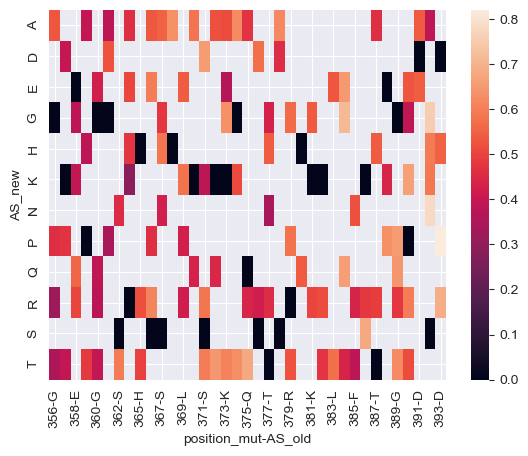

In [29]:
dms_scores_reg = reg_list['DMS_score']

plt.hist(dms_scores_reg, bins=50)
plt.xlabel('DMS Score')
plt.ylabel('Frequency')
plt.title('Distribution of DMS Scores in the Reg Domain')
plt.show()

sns.heatmap(reg_domain)

## Comparing all DMS score distributions

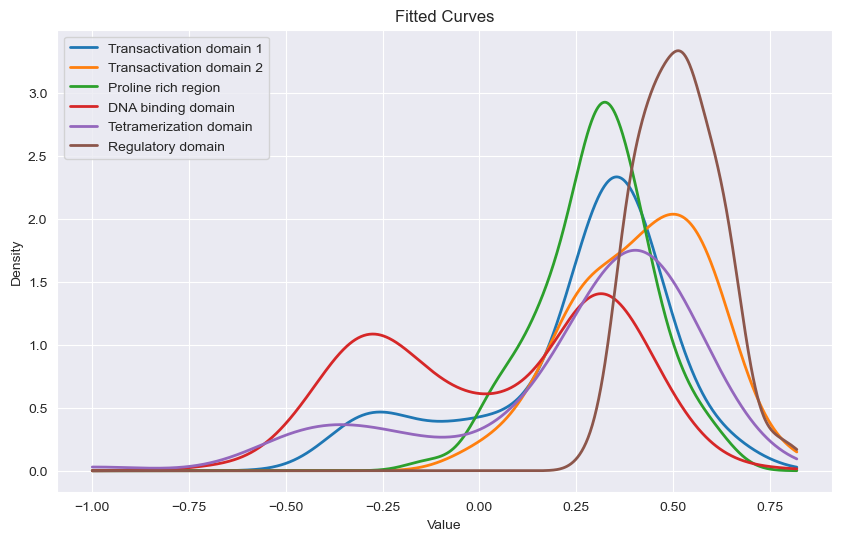

In [30]:
all_dms_scores = np.concatenate((dms_scores_t1, dms_scores_t2, dms_scores_pr,
                                 dms_scores_dna, dms_scores_tetra, dms_scores_reg))


fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the figure size as needed


datasets = ['Transactivation domain 1', 'Transactivation domain 2', 'Proline rich region',
            'DNA binding domain', 'Tetramerization domain', 'Regulatory domain']
for data, label in zip([dms_scores_t1, dms_scores_t2, dms_scores_pr,
                        dms_scores_dna, dms_scores_tetra, dms_scores_reg], datasets):

    kde = gaussian_kde(data)
    x_vals = np.linspace(np.min(all_dms_scores), np.max(all_dms_scores), 1000)
    y_vals = kde(x_vals)


    ax.plot(x_vals, y_vals, linewidth=2, label=label)


ax.set_xlabel('Value')
ax.set_ylabel('Density')
ax.set_title('Fitted Curves')
ax.legend()


plt.show()

## Standard deviation


In [31]:
t1_std = t1_mean.std()
t2_std = t2_mean.std()
pr_std = pr_mean.std()
dna_std = dna_mean.std()
tetra_std = tetra_mean.std()
reg_std = reg_mean.std()

std_combined = pd.DataFrame({
    't1_std': [t1_std],
    't2_std': [t2_std],
    'pr_std': [pr_std],
    'dna_std': [dna_std],
    'tetra_std': [tetra_std],
    'reg_std': [reg_std]
})

std_combined

,t1_std,t2_std,pr_std,dna_std,tetra_std,reg_std
0,0.180861,0.130119,0.078628,0.221639,0.221383,0.076795


## Mean value matrix

Creating a matrix showing the mean substitution DMS score for each aminoacid. For further information see the data_exploration folder.

<Axes: xlabel='AS_new', ylabel='AS_old'>

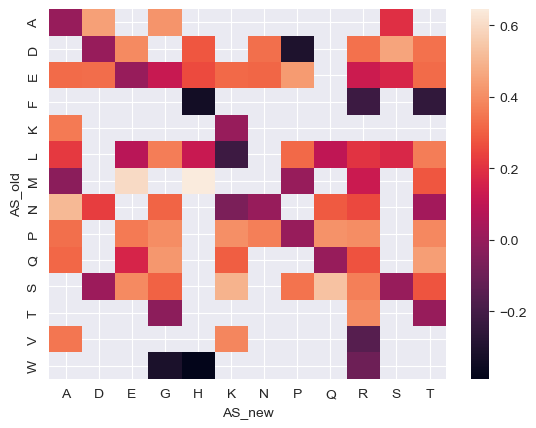

In [32]:
sns.heatmap(dc.rmv_na(de.mean_substitutions(t1_list)))

<Axes: xlabel='AS_new', ylabel='AS_old'>

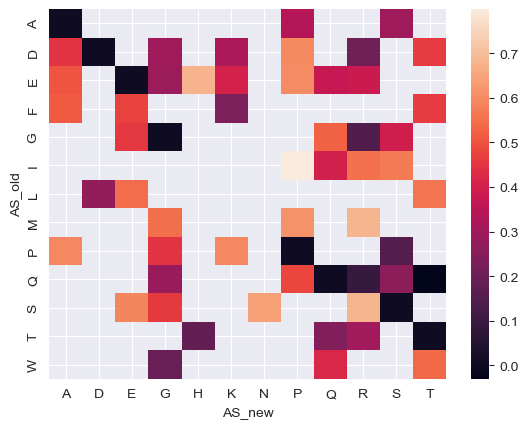

In [33]:
sns.heatmap(dc.rmv_na(de.mean_substitutions(t2_list)))

<Axes: xlabel='AS_new', ylabel='AS_old'>

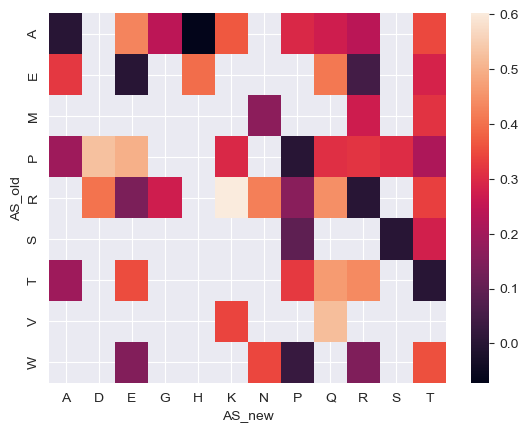

In [34]:
sns.heatmap(dc.rmv_na(de.mean_substitutions(pr_list)))

<Axes: xlabel='AS_new', ylabel='AS_old'>

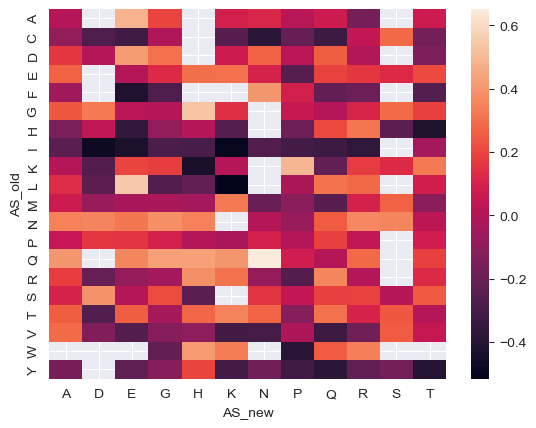

In [35]:
sns.heatmap(dc.rmv_na(de.mean_substitutions(dna_list)))

<Axes: xlabel='AS_new', ylabel='AS_old'>

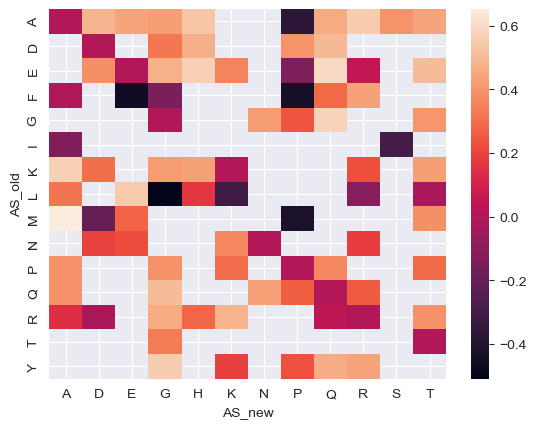

In [36]:
sns.heatmap(dc.rmv_na(de.mean_substitutions(tetra_list)))

<Axes: xlabel='AS_new', ylabel='AS_old'>

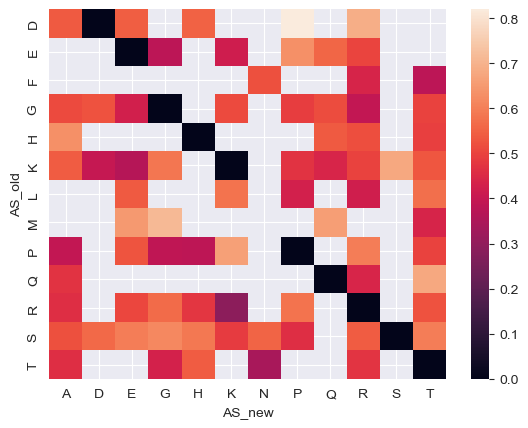

In [37]:
sns.heatmap(dc.rmv_na(de.mean_substitutions(reg_list)))

## Shapiro Wilk test

In [38]:
print('T1 Domain')
print(doc.test_normality(t1_list['DMS_score']))

print('T2 Domain')
print(doc.test_normality(t2_list['DMS_score']))

print('PR Domain')
print(doc.test_normality(pr_list['DMS_score']))

print('DNA Domain')
print(doc.test_normality(dna_list['DMS_score']))

print('Tetra Domain')
print(doc.test_normality(tetra_list['DMS_score']))

print('Reg Domain')
print(doc.test_normality(reg_list['DMS_score']))

T1 Domain
{'statistic': 0.8731576800346375, 'p-value': 2.2338737526439445e-09, 'is_normal': False}
T2 Domain
{'statistic': 0.9843625426292419, 'p-value': 0.6369343400001526, 'is_normal': True}
PR Domain
{'statistic': 0.9878000020980835, 'p-value': 0.5389847159385681, 'is_normal': True}
DNA Domain
{'statistic': 0.9448511600494385, 'p-value': 1.9024788594002896e-14, 'is_normal': False}
Tetra Domain
{'statistic': 0.8278674483299255, 'p-value': 1.162835383539118e-09, 'is_normal': False}
Reg Domain
{'statistic': 0.9861988425254822, 'p-value': 0.3073340952396393, 'is_normal': True}
